Aqui foi feita a importação do Pandas.

In [2]:
import pandas as pd


Aqui foi onde puxei a todas as tabelas limpas e atualizadas

In [3]:
product_category_name_translation = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\product_category_name_translation.csv')
t_olist_geolocation_dataset_1 = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\t_olist_geolocation_dataset-1.csv')
csv_olist_customers_dataset = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\csv_olist_customers_dataset.csv')
t_olist_orders_dataset = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\t_olist_orders_dataset.csv')
csv_olist_order_reviews_dataset = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\csv_olist_order_reviews_dataset.csv')
t_olist_order_payments_dataset  = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\t_olist_order_payments_dataset.csv')
csv_olist_order_items_dataset   = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\csv_olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\olist_products_dataset.csv')
olist_sellers_dataset_cidade_tratado = pd.read_csv(r'C:\Users\ticam\OneDrive\Área de Trabalho\Projeto ifood\Projeto_BigData\Paulo\Dados analisados\olist_sellers_dataset_cidade_tratado.csv')


In [220]:
t_olist_order_payments_dataset 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Aqui foi feita a junção de todas as tabelas utilizando o "merge".

In [13]:
orders_customers = pd.merge(t_olist_orders_dataset, csv_olist_customers_dataset, on='customer_id')
orders_reviws = pd.merge(orders_customers, csv_olist_order_reviews_dataset, on='order_id')
orders_payments = pd.merge(orders_reviws, t_olist_order_payments_dataset, on='order_id')
orders_items = pd.merge(orders_payments, csv_olist_order_items_dataset, on='order_id')
orders_product = pd.merge(orders_items, olist_products_dataset, on='product_id')
orders_seller = pd.merge(orders_product, olist_sellers_dataset_cidade_tratado, on='seller_id')


Aqui foi onde vizualizei se as colunas estão certas.

In [14]:
orders_seller.columns

Index(['order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp_date', 'order_purchase_timestamp_hour',
       'order_approved_at_date', 'order_approved_at_hour',
       'order_delivered_carrier_date_date',
       'order_delivered_carrier_date_hour',
       'order_delivered_customer_date_date',
       'order_delivered_customer_date_hour',
       'order_estimated_delivery_date_date',
       'order_estimated_delivery_date_hour', 'Unnamed: 0_x',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Unnamed: 0_y', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_creation_hour', 'review_answer_date',
       'review_answer_hour', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'Unnamed: 0', 'order_item_id',
       'product_id', 'seller_id', 'price', 'freight_value', 'date_id',
       'time_id', 'product_category_nam

Aqui foi feito um novo dataframe com as colunas juntas para facilitar a análise.

In [15]:

orders_seller.to_csv('tabela_completa.csv', index=False)  


Aqui comecei a separação de colunas especificas para análise e criação dos gráficos.

In [17]:
novas_colunas = orders_seller.loc[:,['customer_state', 'product_category_name']]

In [18]:
novas_colunas

,customer_state,product_category_name
0,SP,utilidades_domesticas
1,SP,utilidades_domesticas
2,SP,utilidades_domesticas
3,SP,utilidades_domesticas
4,SP,utilidades_domesticas
...,...,...
114837,SP,construcao_ferramentas_iluminacao
114838,CE,moveis_decoracao
114839,PR,eletronicos
114840,MG,moveis_decoracao


Aqui continuei fazendo o agrupamento.

In [19]:
total_pedidos_por_estado = orders_seller.groupby(['customer_state', 'product_category_name'])['order_id'].count().reset_index()

In [20]:
total_pedidos_por_estado

,customer_state,product_category_name,order_id
0,AC,artigos_de_natal,1
1,AC,automotivo,5
2,AC,bebes,3
3,AC,beleza_saude,7
4,AC,brinquedos,3
...,...,...,...
1352,TO,portateis_casa_forno_e_cafe,1
1353,TO,relogios_presentes,29
1354,TO,telefonia,21
1355,TO,telefonia_fixa,2


Aqui fiz a separação de estados e regiões.

In [21]:

estados_por_regiao = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}


dados = []
for regiao, estados in estados_por_regiao.items():
    for estado in estados:
        dados.append((estado, regiao))


df_estados_por_regiao = pd.DataFrame(dados, columns=['state', 'regiao'])


for index, row in df_estados_por_regiao.iterrows():
    print(f"{row['state']} : {row['regiao']}")


AC : Norte
AP : Norte
AM : Norte
PA : Norte
RO : Norte
RR : Norte
TO : Norte
AL : Nordeste
BA : Nordeste
CE : Nordeste
MA : Nordeste
PB : Nordeste
PE : Nordeste
PI : Nordeste
RN : Nordeste
SE : Nordeste
DF : Centro-Oeste
GO : Centro-Oeste
MT : Centro-Oeste
MS : Centro-Oeste
ES : Sudeste
MG : Sudeste
RJ : Sudeste
SP : Sudeste
PR : Sul
RS : Sul
SC : Sul


Aqui fiz a tranformação de todos os estados para as suas respectivas regiões.

In [22]:
df_total_pedidos_regiao = total_pedidos_por_estado.merge(df_estados_por_regiao, right_on='state', left_on='customer_state', how='left')

In [23]:
df_final = df_total_pedidos_regiao.groupby(['regiao', 'product_category_name'])['order_id'].sum().reset_index()
df_final.rename(columns={'order_id': 'total_pedidos_regiao'}, inplace=True)

Aqui criei um novo dataframe para facilitar a análise

In [57]:

df_final.to_csv('df_final.csv', index=False)  

Depois de pronto ficou assim:

In [58]:
df_final

,regiao,product_category_name,total_pedidos_regiao
0,Centro-Oeste,agro_industria_e_comercio,10
1,Centro-Oeste,alimentos,24
2,Centro-Oeste,alimentos_bebidas,5
3,Centro-Oeste,artes,11
4,Centro-Oeste,artes_e_artesanato,1
...,...,...,...
334,Sul,sinalizacao_e_seguranca,32
335,Sul,tablets_impressao_imagem,4
336,Sul,telefonia,717
337,Sul,telefonia_fixa,32


Aqui comecei a separações das regiões e a fazer a análise dos produtos mais vendidos

Comecei pela região centro-oeste

In [73]:
centro_oeste = df_final.loc[0:65]

In [74]:
centro_oeste

,regiao,product_category_name,total_pedidos_regiao
0,Centro-Oeste,agro_industria_e_comercio,10
1,Centro-Oeste,alimentos,24
2,Centro-Oeste,alimentos_bebidas,5
3,Centro-Oeste,artes,11
4,Centro-Oeste,artes_e_artesanato,1
...,...,...,...
61,Centro-Oeste,sinalizacao_e_seguranca,17
62,Centro-Oeste,tablets_impressao_imagem,6
63,Centro-Oeste,telefonia,318
64,Centro-Oeste,telefonia_fixa,10


Criei um novo dataframe apenas com os estados do centro-oeste

In [61]:

centro_oeste.to_csv('tcentro_oeste.csv', index=False)  


In [75]:
centro_oeste

,regiao,product_category_name,total_pedidos_regiao
0,Centro-Oeste,agro_industria_e_comercio,10
1,Centro-Oeste,alimentos,24
2,Centro-Oeste,alimentos_bebidas,5
3,Centro-Oeste,artes,11
4,Centro-Oeste,artes_e_artesanato,1
...,...,...,...
61,Centro-Oeste,sinalizacao_e_seguranca,17
62,Centro-Oeste,tablets_impressao_imagem,6
63,Centro-Oeste,telefonia,318
64,Centro-Oeste,telefonia_fixa,10


Aqui fiz a separação das cateogrias e a quantidade que foi vendida.

In [78]:


data = {
    'regiao': ['Centro-Oeste'] * 66,
    'product_category_name': [
          'agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas',
        'artigos_de_natal', 'audio', 'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos', 'cama_mesa_banho',
        'casa_conforto', 'casa_conforto_2', 'casa_construcao', 'cine_foto', 'climatizacao', 'consoles_games',
        'construcao_ferramentas_construcao', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao',
        'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray',
        'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos', 'eletroportateis', 'esporte_lazer',
        'fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_esporte', 'fashion_roupa_feminina',
        'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores',
        'industria_comercio_e_negocios', 'informatica_acessorios', 'instrumentos_musicais', 'livros_interesse_geral',
        'livros_tecnicos', 'malas_acessorios', 'market_place', 'moveis_colchao_e_estofado',
        'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto',
        'moveis_sala', 'musica', 'papelaria', 'pcs', 'perfumaria', 'pet_shop', 'portateis_casa_forno_e_cafe',
        'relogios_presentes', 'seguros_e_servicos', 'sinalizacao_e_seguranca', 'tablets_impressao_imagem', 'telefonia',
        'telefonia_fixa', 'utilidades_domesticas'
    ],
    'total_pedidos_regiao': [10, 24, 5, 11, 1, 3, 14, 28, 272, 194, 17, 636, 269, 609, 21, 5, 36, 3, 15, 64, 45, 9, 21, 14, 16, 249, 12, 46,
                            14, 134, 49, 544, 122, 22, 2, 4, 4, 11, 250, 2, 15, 423, 32, 35, 18, 53, 22, 3, 12, 412, 64, 5, 24, 2, 148, 17,
                            254, 108, 3, 406, 1, 17, 6, 318, 10, 384]
}


df = pd.DataFrame(data)


dados_centro_oeste = df[df['regiao'] == 'Centro-Oeste']


top_5_categories = dados_centro_oeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nlargest(5)
print("As 5 categorias mais vendidas na região Centro-Oeste são:\n", top_5_categories)


As 5 categorias mais vendidas na região Centro-Oeste são:
 product_category_name
beleza_saude              636
cama_mesa_banho           609
esporte_lazer             544
informatica_acessorios    423
moveis_decoracao          412
Name: total_pedidos_regiao, dtype: int64


Agora é a região Nordeste.

In [92]:
nordeste = df_final.loc[66:134]

In [93]:
nordeste

,regiao,product_category_name,total_pedidos_regiao
66,Nordeste,agro_industria_e_comercio,21
67,Nordeste,alimentos,41
68,Nordeste,alimentos_bebidas,28
69,Nordeste,artes,15
70,Nordeste,artigos_de_festas,1
...,...,...,...
130,Nordeste,sinalizacao_e_seguranca,17
131,Nordeste,tablets_impressao_imagem,14
132,Nordeste,telefonia,707
133,Nordeste,telefonia_fixa,34


Criei um novo dataframe apenas com os estados do Nordeste

In [94]:

nordeste.to_csv('nordeste.csv', index=False) 


In [95]:
nordeste

,regiao,product_category_name,total_pedidos_regiao
66,Nordeste,agro_industria_e_comercio,21
67,Nordeste,alimentos,41
68,Nordeste,alimentos_bebidas,28
69,Nordeste,artes,15
70,Nordeste,artigos_de_festas,1
...,...,...,...
130,Nordeste,sinalizacao_e_seguranca,17
131,Nordeste,tablets_impressao_imagem,14
132,Nordeste,telefonia,707
133,Nordeste,telefonia_fixa,34


Aqui fiz a separação das cateogrias e a quantidade que foi vendida.

In [114]:
data = {
    'regiao': ['Nordeste'] * 69,
    'product_category_name': [
        'agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artigos_de_festas',
        'artigos_de_natal', 'audio', 'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos',
        'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2', 'casa_construcao', 'cds_dvds_musicais',
        'cine_foto', 'climatizacao', 'consoles_games', 'construcao_ferramentas_construcao',
        'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim',
        'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray', 'eletrodomesticos', 'eletrodomesticos_2',
        'eletronicos', 'eletroportateis', 'esporte_lazer', 'fashion_bolsas_e_acessorios', 'fashion_calcados',
        'fashion_esporte', 'fashion_roupa_feminina', 'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina',
        'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'fraldas_higiene', 'industria_comercio_e_negocios',
        'informatica_acessorios', 'instrumentos_musicais', 'livros_importados', 'livros_interesse_geral',
        'livros_tecnicos', 'malas_acessorios', 'market_place', 'moveis_colchao_e_estofado',
        'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto',
        'moveis_sala', 'musica', 'papelaria', 'pc_gamer', 'pcs', 'perfumaria', 'pet_shop',
        'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos', 'relogios_presentes',
        'sinalizacao_e_seguranca', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'utilidades_domesticas'
    ],
    'total_pedidos_regiao': [21, 41, 28, 15, 1, 18, 38, 460, 263, 11, 1180, 375, 614, 33, 1, 52, 1, 5, 15, 112, 71, 8, 12, 31, 24, 418, 5, 64,
16, 282, 44, 753, 232, 29, 3, 3, 1, 14, 9, 436, 2, 21, 735, 82, 3, 67, 24, 109, 36, 1, 14, 638, 198, 9, 40, 1,
239, 1, 58, 299, 144, 4, 1, 812, 17, 14, 707, 34, 398]
}


df = pd.DataFrame(data)

dados_centro_oeste = df[df['regiao'] == 'Nordeste']

top_5_categories = dados_centro_oeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nlargest(5)
print("As 5 categorias mais vendidas na região Nordeste são:\n", top_5_categories)


As 5 categorias mais vendidas na região Nordeste são:
 product_category_name
beleza_saude              1180
relogios_presentes         812
esporte_lazer              753
informatica_acessorios     735
telefonia                  707
Name: total_pedidos_regiao, dtype: int64


Agora é a região Norte.

In [119]:
norte = df_final.loc[135:194]

Aqui criei um novo dataframe para a região Norte.

In [ ]:

norte.to_csv('norte.csv', index=False)  


In [120]:
norte

,regiao,product_category_name,total_pedidos_regiao
135,Norte,agro_industria_e_comercio,7
136,Norte,alimentos,2
137,Norte,alimentos_bebidas,1
138,Norte,artes,6
139,Norte,artigos_de_natal,3
140,Norte,audio,3
141,Norte,automotivo,92
142,Norte,bebes,71
143,Norte,bebidas,2
144,Norte,beleza_saude,214


Aqui separei todos as categorias e quantidades que foram vendidas.

In [122]:
data = {
    'regiao': ['Norte'] * 60,
    'product_category_name': [
        'agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artigos_de_natal', 'audio',
        'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos', 'cama_mesa_banho', 'casa_conforto',
        'casa_construcao', 'cine_foto', 'climatizacao', 'consoles_games', 'construcao_ferramentas_construcao',
        'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca',
        'cool_stuff', 'dvds_blu_ray', 'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos', 'eletroportateis',
        'esporte_lazer', 'fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_esporte', 'fashion_roupa_masculina',
        'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'industria_comercio_e_negocios', 'informatica_acessorios',
        'instrumentos_musicais', 'livros_importados', 'livros_interesse_geral', 'livros_tecnicos', 'malas_acessorios',
        'market_place', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio',
        'moveis_sala', 'musica', 'papelaria', 'pcs', 'perfumaria', 'pet_shop', 'portateis_casa_forno_e_cafe',
        'portateis_cozinha_e_preparadores_de_alimentos', 'relogios_presentes', 'seguros_e_servicos',
        'sinalizacao_e_seguranca', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'utilidades_domesticas'
    ],
    'total_pedidos_regiao': [7, 2, 1, 6, 3, 3, 92, 71, 2, 214, 69, 89, 2, 7, 3, 1, 25, 6, 3, 5, 1, 83, 1, 17, 17, 55, 11,
                             165, 56, 8, 4, 2, 3, 65, 2, 176, 16, 2, 11, 4, 22, 10, 2, 125, 41, 5, 1, 47, 10, 65, 30,
                             2, 1, 141, 1, 3, 5, 143, 9, 72]
}

df = pd.DataFrame(data)

dados_centro_oeste = df[df['regiao'] == 'Norte']

top_5_categories = dados_centro_oeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nlargest(5)
print("As 5 categorias mais vendidas na região Norte são:\n", top_5_categories)

As 5 categorias mais vendidas na região Norte são:
 product_category_name
beleza_saude              214
informatica_acessorios    176
esporte_lazer             165
telefonia                 143
relogios_presentes        141
Name: total_pedidos_regiao, dtype: int64


Agora é a região Sudeste.

In [128]:
sudeste = df_final.loc[195:266]

In [129]:
sudeste

,regiao,product_category_name,total_pedidos_regiao
195,Sudeste,agro_industria_e_comercio,184
196,Sudeste,alimentos,378
197,Sudeste,alimentos_bebidas,220
198,Sudeste,artes,151
199,Sudeste,artes_e_artesanato,22
...,...,...,...
262,Sudeste,sinalizacao_e_seguranca,129
263,Sudeste,tablets_impressao_imagem,56
264,Sudeste,telefonia,2693
265,Sudeste,telefonia_fixa,174


Aqui criei um novo dataframe para a região Sudeste.

In [130]:

sudeste.to_csv('sudeste.csv', index=False) 


Aqui separei todos as categorias e quantidades que foram vendidas.

In [139]:
data = {
    'regiao': ['Sudeste'] * 72,
    'product_category_name': [
        'agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', 'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos', 'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2', 'casa_construcao', 'cds_dvds_musicais', 'cine_foto', 'climatizacao', 'consoles_games', 'construcao_ferramentas_construcao', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray', 'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos', 'eletroportateis', 'esporte_lazer', 'fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_esporte', 'fashion_roupa_feminina', 'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores', 'fraldas_higiene', 'industria_comercio_e_negocios', 'informatica_acessorios', 'instrumentos_musicais', 'la_cuisine', 'livros_importados', 'livros_interesse_geral', 'livros_tecnicos', 'malas_acessorios', 'market_place', 'moveis_colchao_e_estofado', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto', 'moveis_sala', 'musica', 'papelaria', 'pc_gamer', 'pcs', 'perfumaria', 'pet_shop', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos', 'relogios_presentes', 'sinalizacao_e_seguranca', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'utilidades_domesticas'

    ],
    'total_pedidos_regiao': [2184, 378, 220, 151, 22, 33, 85, 258, 2829, 2075, 295, 6544, 2900, 8882, 370, 20, 436, 8, 43, 227, 786, 687, 64, 215,
        174, 107, 2466, 38, 560, 172, 1846, 459, 5936, 1416, 172, 16, 36, 5, 94, 99, 2996, 26, 33, 176, 5363, 459, 9, 49, 339,
        185, 808, 203, 34, 225, 5920, 1227, 94, 393, 28, 1738, 7, 111, 2441, 1439, 49, 11, 3926, 129, 56, 2693, 174, 5231
    ]
}


df = pd.DataFrame(data)

dados_sudeste = df[df['regiao'] == 'Sudeste']

top_5_categories = dados_sudeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nlargest(5)
print("As 5 categorias mais vendidas na região Sudeste são:\n", top_5_categories)


As 5 categorias mais vendidas na região Sudeste são:
 product_category_name
cama_mesa_banho           8882
beleza_saude              6544
esporte_lazer             5936
moveis_decoracao          5920
informatica_acessorios    5363
Name: total_pedidos_regiao, dtype: int64


Agora é a região Sul.

In [144]:
sul = df_final.loc[267:340]

In [145]:
sul

,regiao,product_category_name,total_pedidos_regiao
267,Sul,agro_industria_e_comercio,24
268,Sul,alimentos,58
269,Sul,alimentos_bebidas,27
270,Sul,artes,22
271,Sul,artes_e_artesanato,1
...,...,...,...
334,Sul,sinalizacao_e_seguranca,32
335,Sul,tablets_impressao_imagem,4
336,Sul,telefonia,717
337,Sul,telefonia_fixa,32


Aqui criei um novo dataframe para a região Sul.

In [146]:

sul.to_csv('sul.csv', index=False) 

Aqui separei todos as categorias e quantidades que foram vendidas.

In [148]:
data = {
    'regiao': ['Sul'] * 72,
    'product_category_name': [
        'agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes', 'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio', 'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos', 'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2', 'casa_construcao', 'cds_dvds_musicais', 'cine_foto', 'climatizacao', 'consoles_games', 'construcao_ferramentas_construcao', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray', 'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos', 'eletroportateis', 'esporte_lazer', 'fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_esporte', 'fashion_roupa_feminina', 'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores', 'fraldas_higiene', 'industria_comercio_e_negocios', 'informatica_acessorios', 'instrumentos_musicais', 'la_cuisine', 'livros_importados', 'livros_interesse_geral', 'livros_tecnicos', 'malas_acessorios', 'market_place', 'moveis_colchao_e_estofado', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto', 'moveis_sala', 'musica', 'papelaria', 'pc_gamer', 'pcs', 'perfumaria', 'pet_shop', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos', 'relogios_presentes', 'sinalizacao_e_seguranca', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'utilidades_domesticas'

    ],
    'total_pedidos_regiao': [24, 58, 27, 22, 1, 8, 25, 48, 606, 493, 46, 1175, 548, 1490, 45, 2, 92, 5, 18, 31, 143, 128, 20, 51, 17, 37, 669, 11, 119, 43, 472, 115, 1336, 289, 37, 5, 3, 1, 23, 17, 704, 3, 2, 51, 1229, 93, 6, 5, 92, 36, 152, 52, 2, 36, 1459, 218, 11, 52, 8, 385, 1, 17, 438, 277, 17, 1, 745, 32, 4, 717, 32, 1069

    ]
}


df = pd.DataFrame(data)

dados_sudeste = df[df['regiao'] == 'Sul']

top_5_categories = dados_sudeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nlargest(5)
print("As 5 categorias mais vendidas na região Sul são:\n", top_5_categories)


As 5 categorias mais vendidas na região Sul são:
 product_category_name
cama_mesa_banho           1490
moveis_decoracao          1459
esporte_lazer             1336
informatica_acessorios    1229
beleza_saude              1175
Name: total_pedidos_regiao, dtype: int64


E aqui foi a criação do gráfico onde mostra as categorias que mais foram vendidas de acordo com a região.

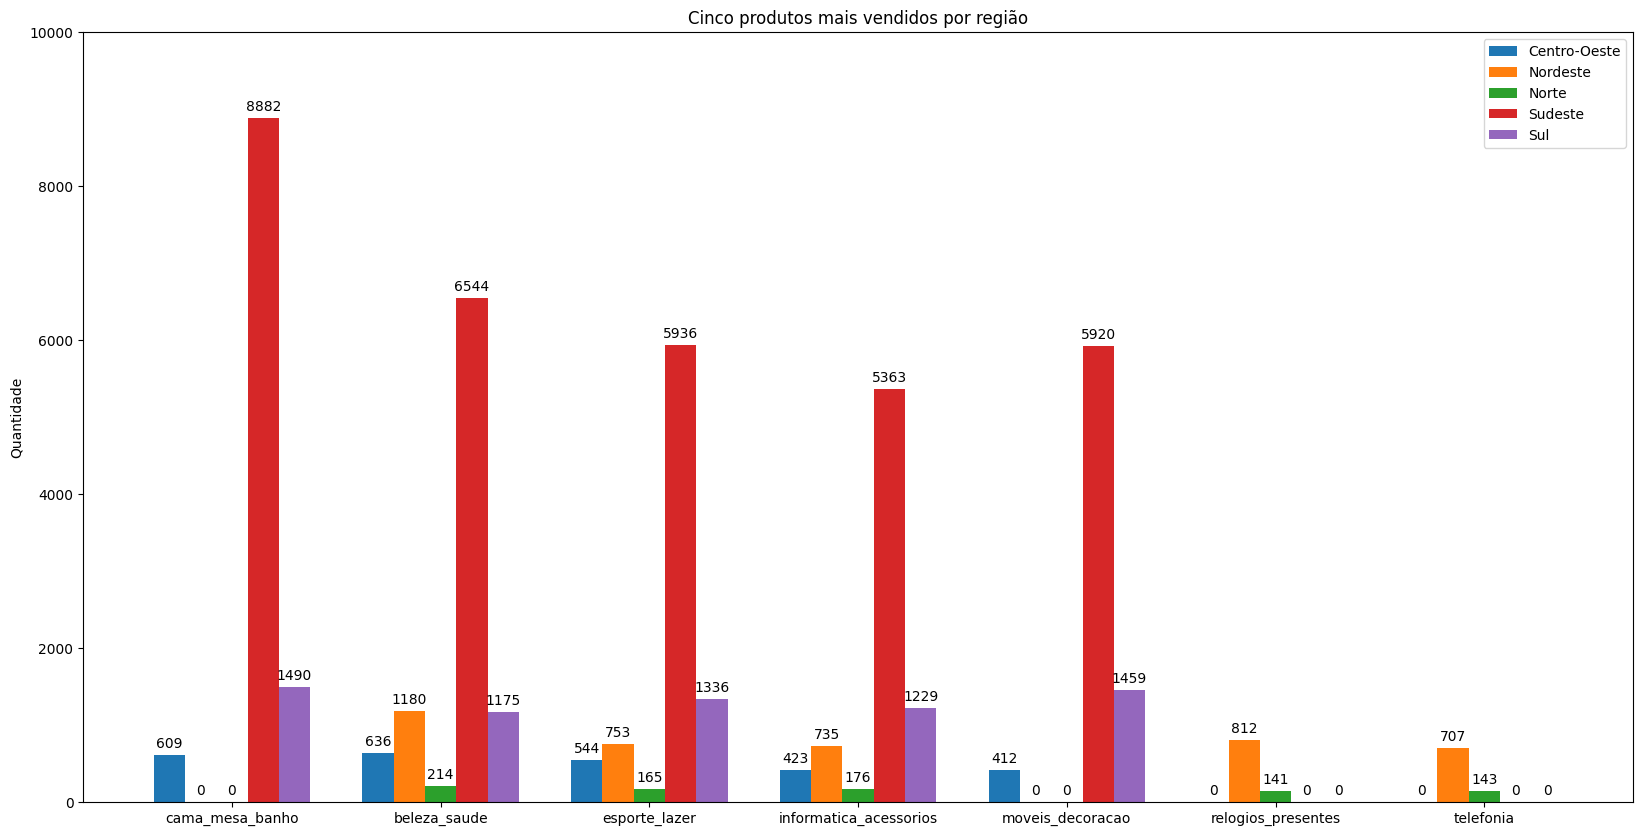

In [216]:

species = ('cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'informatica_acessorios', 'moveis_decoracao', 'relogios_presentes', 'telefonia')

penguin_means = {
    'Centro-Oeste': {
        'beleza_saude': 636,
        'cama_mesa_banho': 609,
        'esporte_lazer': 544,
        'informatica_acessorios': 423,
        'moveis_decoracao': 412,
    },
    'Nordeste': {
        'beleza_saude': 1180,
        'relogios_presentes': 812,
        'esporte_lazer': 753,
        'informatica_acessorios': 735,
        'telefonia': 707,
    },
    'Norte': {
        'beleza_saude': 214,
        'informatica_acessorios': 176,
        'esporte_lazer': 165,
        'telefonia': 143,
        'relogios_presentes': 141,
    },
    'Sudeste': {
        'cama_mesa_banho': 8882,
        'beleza_saude': 6544,
        'esporte_lazer': 5936,
        'moveis_decoracao': 5920,
        'informatica_acessorios': 5363,
    },
    'Sul': {
        'cama_mesa_banho': 1490,
        'moveis_decoracao': 1459,
        'esporte_lazer': 1336,
        'informatica_acessorios': 1229,
        'beleza_saude': 1175,
    },
}

x = np.arange(len(species)) 
width = 0.15  

fig, ax = plt.subplots(figsize=(20, 10))

regions = list(penguin_means.keys())
multiplier = 0

for region in regions:
    region_data = penguin_means[region]
    values = [region_data.get(species[i], 0) for i in range(len(species))]
    rects = ax.bar(x + width * multiplier, values, width, label=region)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Quantidade')
ax.set_title('Cinco produtos mais vendidos por região')
ax.set_xticks(x + width * ((len(regions) - 1) / 2))
ax.set_xticklabels(species)
ax.legend()
ax.set_ylim(0, 10000)

plt.show()


Produtos menos vendidos

Centro-Oeste

In [155]:
bottom_5_categories = dados_centro_oeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nsmallest(5)
print("As 5 categorias menos vendidas na região Centro-Oeste são:\n", bottom_5_categories)


As 5 categorias menos vendidas na região Centro-Oeste são:
 product_category_name
alimentos_bebidas                   1
climatizacao                        1
construcao_ferramentas_seguranca    1
dvds_blu_ray                        1
musica                              1
Name: total_pedidos_regiao, dtype: int64


Nordeste

In [166]:
ottom_5_categories_north = nordeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nsmallest(5)
print("As 5 categorias menos vendidas na região Norte são:\n", bottom_5_categories_north)

As 5 categorias menos vendidas na região Norte são:
 product_category_name
alimentos_bebidas                   1
climatizacao                        1
construcao_ferramentas_seguranca    1
dvds_blu_ray                        1
musica                              1
Name: total_pedidos_regiao, dtype: int64


Norte

In [165]:
bottom_5_categories_north = norte.groupby('product_category_name')['total_pedidos_regiao'].sum().nsmallest(5)
print("As 5 categorias menos vendidas na região Norte são:\n", bottom_5_categories_north)


As 5 categorias menos vendidas na região Norte são:
 product_category_name
alimentos_bebidas                   1
climatizacao                        1
construcao_ferramentas_seguranca    1
dvds_blu_ray                        1
musica                              1
Name: total_pedidos_regiao, dtype: int64


Sudeste

In [167]:
bottom_5_categories_north = sudeste.groupby('product_category_name')['total_pedidos_regiao'].sum().nsmallest(5)
print("As 5 categorias menos vendidas na região Sudeste são:\n", bottom_5_categories_north)


As 5 categorias menos vendidas na região Sudeste são:
 product_category_name
fashion_roupa_infanto_juvenil                     5
pc_gamer                                          7
cds_dvds_musicais                                 8
la_cuisine                                        9
portateis_cozinha_e_preparadores_de_alimentos    11
Name: total_pedidos_regiao, dtype: int64


Sul

In [168]:
bottom_5_categories_north = sul.groupby('product_category_name')['total_pedidos_regiao'].sum().nsmallest(5)
print("As 5 categorias menos vendidas na região Sul são:\n", bottom_5_categories_north)


As 5 categorias menos vendidas na região Sul são:
 product_category_name
artes_e_artesanato                               1
fashion_roupa_infanto_juvenil                    1
pc_gamer                                         1
portateis_cozinha_e_preparadores_de_alimentos    1
casa_conforto_2                                  2
Name: total_pedidos_regiao, dtype: int64


Aqui separei todos as categorias e quantidades que foram vendidas.

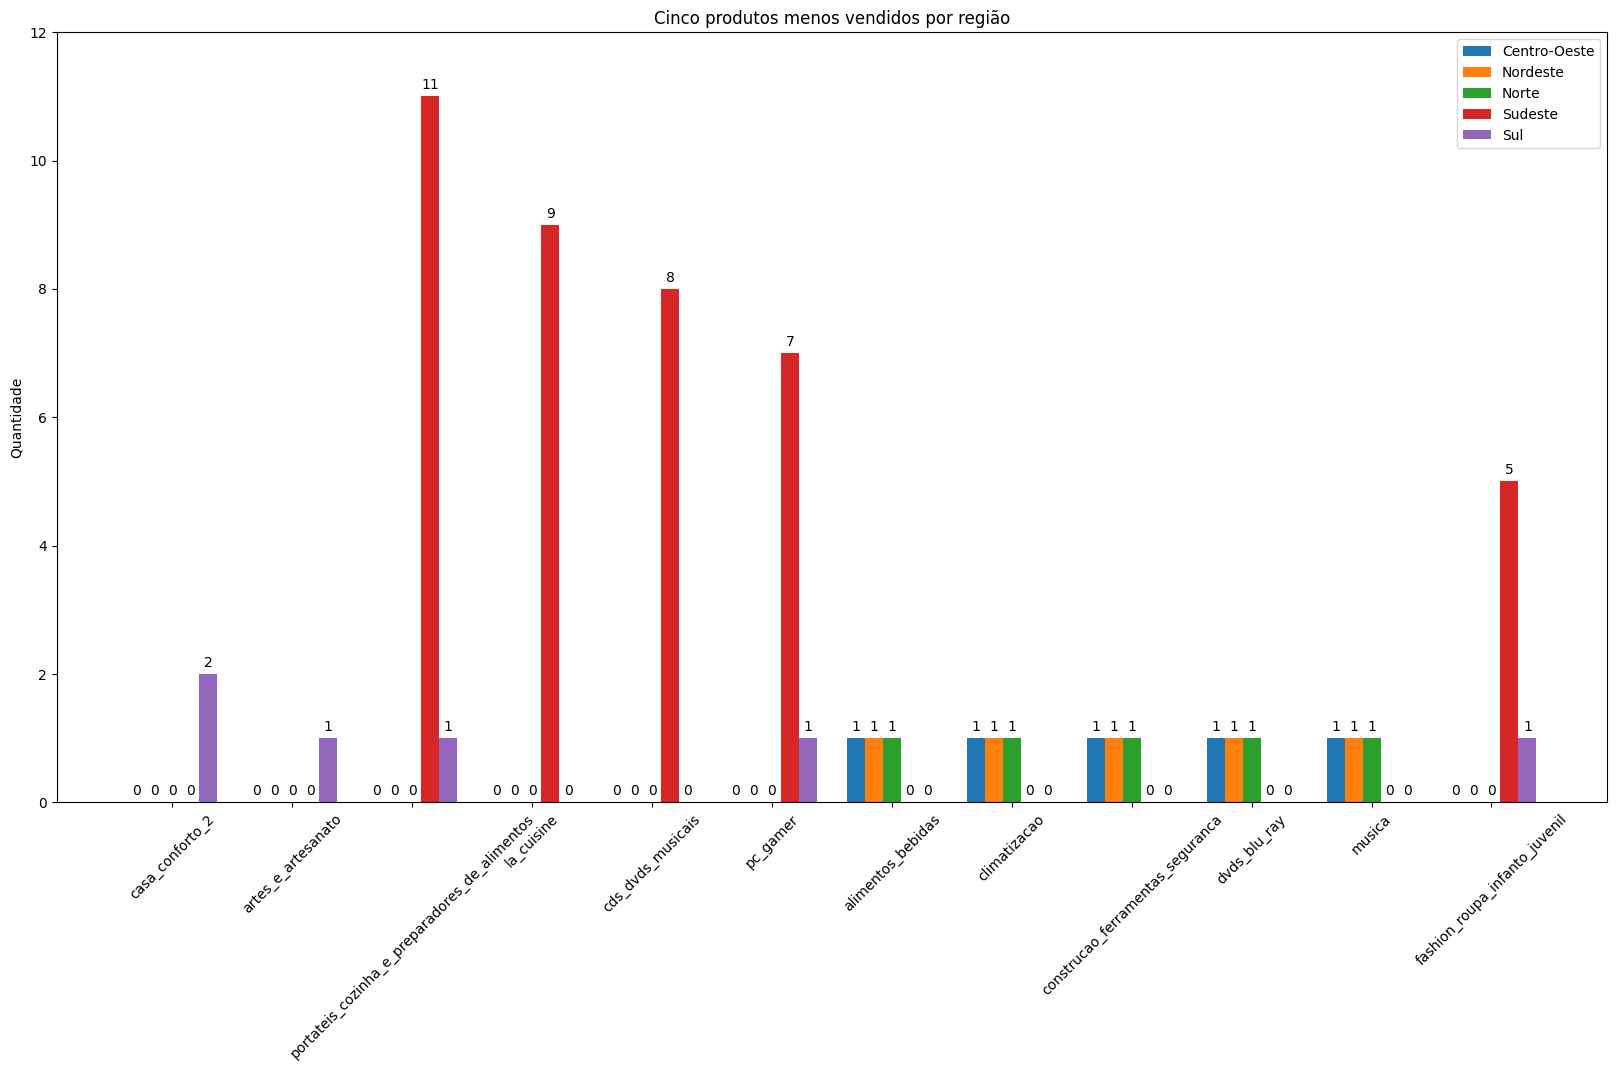

In [215]:
import matplotlib.pyplot as plt
import numpy as np

species = ('casa_conforto_2', 'artes_e_artesanato', 'portateis_cozinha_e_preparadores_de_alimentos', 'la_cuisine', 'cds_dvds_musicais', 'pc_gamer', 'alimentos_bebidas', 'climatizacao', 'construcao_ferramentas_seguranca', 'dvds_blu_ray', 'musica', 'fashion_roupa_infanto_juvenil')


penguin_means = {
    'Centro-Oeste': {
        'alimentos_bebidas': 1,
        'climatizacao': 1,
        'construcao_ferramentas_seguranca': 1,
        'dvds_blu_ray': 1,
        'musica': 1
    },
    'Nordeste': {
        'alimentos_bebidas': 1,
        'climatizacao': 1,
        'construcao_ferramentas_seguranca': 1,
        'dvds_blu_ray': 1,
        'musica': 1
    },
    'Norte': {
        'alimentos_bebidas': 1,
        'climatizacao': 1,
        'construcao_ferramentas_seguranca': 1,
        'dvds_blu_ray': 1,
        'musica': 1
    },
    'Sudeste': {
        'fashion_roupa_infanto_juvenil': 5,
        'pc_gamer': 7,
        'cds_dvds_musicais': 8,
        'la_cuisine': 9,
        'portateis_cozinha_e_preparadores_de_alimentos': 11
    },
    'Sul': {
        'artes_e_artesanato': 1,
        'fashion_roupa_infanto_juvenil': 1,
        'pc_gamer': 1,
        'portateis_cozinha_e_preparadores_de_alimentos': 1,
        'casa_conforto_2': 2
    },
}

x = np.arange(len(species))  
width = 0.15  
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 10))

for region, categories in penguin_means.items():
    category_values = [categories.get(cat, 0) for cat in species]
    offset = width * multiplier
    rects = ax.bar(x + offset, category_values, width, label=region)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Quantidade')
ax.set_title('Cinco produtos menos vendidos por região')
ax.set_xticks(x + width * ((multiplier - 1) / 2))
ax.set_xticklabels(species, rotation=45)  
ax.legend()
ax.set_ylim(0, 12)

plt.show()


Média de vendas

Centro - Oeste

In [174]:

dados_centro_oeste = df[df['regiao'] == 'Centro-Oeste']


media_vendas_centro_oeste = centro_oeste['total_pedidos_regiao'].mean()
print("Média de vendas na região Centro-Oeste:", media_vendas_centro_oeste)

Média de vendas na região Centro-Oeste: 99.98484848484848


Nordeste

In [171]:
# Filtrar os dados para a região Nordeste
dados_nordeste = df[df['regiao'] == 'Nordeste']

# Calcular a média de vendas para a região Nordeste
media_vendas_nordeste = nordeste['total_pedidos_regiao'].mean()
print("Média de vendas na região Nordeste:", media_vendas_nordeste)


Média de vendas na região Nordeste: 151.40579710144928


Norte

In [173]:

dados_norte = df[df['regiao'] == 'Norte']


media_vendas_norte = norte['total_pedidos_regiao'].mean()
print("Média de vendas na região Norte:", media_vendas_norte)

Média de vendas na região Norte: 42.04838709677419


Sudeste

In [175]:

dados_sudeste = df[df['regiao'] == 'Sudeste']


media_vendas_sudeste = sudeste['total_pedidos_regiao'].mean()
print("Média de vendas na região Sudeste:", media_vendas_sudeste)

Média de vendas na região Sudeste: 1081.6666666666667


Sul

In [176]:

dados_sul = df[df['regiao'] == 'Sul']


media_vendas_sul = sul['total_pedidos_regiao'].mean()
print("Média de vendas na região sul:", media_vendas_sul)

Média de vendas na região sul: 225.63888888888889


Gráfico com a média de vendas por região

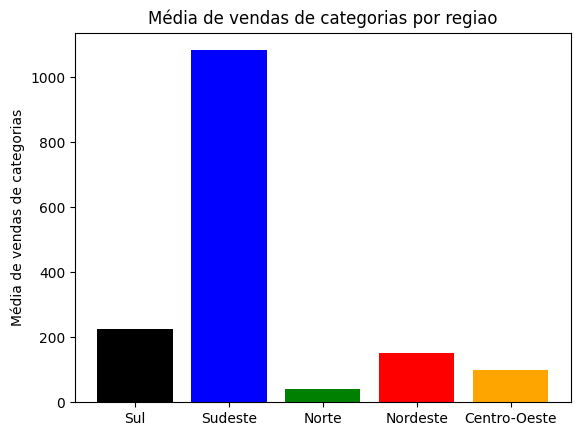

In [219]:


fig, ax = plt.subplots()
fruits = ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']
counts = [225.63, 1081.66, 42.04, 151.40, 99.98]
bar_colors = ['black', 'blue', 'green', 'red', 'orange']

ax.bar(fruits, counts, color=bar_colors)

ax.set_ylabel('Média de vendas de categorias')
ax.set_title('Média de vendas de categorias por regiao')
plt.show()
